**Разберем базу данных с сайта https://podbor.io/ где любой желающий может оставить информацию о найме в своей компании**

**План работы:**
- Приведем данные в порядок
- Переведем информацию в числовой формат
- Проведем кластеризацию методом k-means
- Подведем итоги 

In [1]:
import pandas as pd
import numpy as np

#Читаем файл и удаляем пустые ячейки
DATA = pd.read_csv('base.csv')
DATA = DATA.dropna(subset=['Компания','Статус найма в компании','Отрасль', 'Каких отделов это касается?'])
DATA 

,Компания,Статус найма в компании,Каких отделов это касается?,"Роль человека, добавившего компанию",Отрасль,Комментарий,Дата добавления
0,-,Найм частично продолжается,Маркетинг и PR; Продажи; Рабочий персонал,Сотрудник,IT-компания,NaN,NaN
1,-,Найм идет полным ходом,IT,Сотрудник,IT-компания,NaN,NaN
2,«КА»,Найм остановлен,Все отделы,HR / HRD или рекрутер,Консалтинг,NaN,NaN
3,2ГИС,Найм частично продолжается,Большая часть отделов; IT,HR / HRD или рекрутер,IT-компания,все актуальные вакансии на job@2gis.ru,NaN
4,9 Pandas,Найм идет полным ходом,Все отделы; IT; Маркетинг и PR,HR / HRD или рекрутер,Другое,"Мы рекламное агентство, но и кинопроизводител...",NaN
...,...,...,...,...,...,...,...
753,ЭФКО,Найм идет полным ходом,Все отделы,Сотрудник,Промышленность,NaN,NaN
754,ЮMoney,Найм идет полным ходом,Большая часть отделов,Сотрудник,Финансовый сектор,NaN,NaN
756,Яндекс,Найм частично продолжается,Большая часть отделов,HR / HRD или рекрутер,IT-компания,NaN,NaN
757,яндекс,Найм частично продолжается,Большая часть отделов,Сотрудник,IT-компания,NaN,NaN


### Удалим столбцы которые в которых нет полезных данных для нас

In [2]:
clear = DATA.drop(['Комментарий', 'Дата добавления'], axis = 1)
clear['Компания'] = clear['Компания'].str.title() #Сделаем все названия компаний с большой буквы
clear

,Компания,Статус найма в компании,Каких отделов это касается?,"Роль человека, добавившего компанию",Отрасль
0,-,Найм частично продолжается,Маркетинг и PR; Продажи; Рабочий персонал,Сотрудник,IT-компания
1,-,Найм идет полным ходом,IT,Сотрудник,IT-компания
2,«Ка»,Найм остановлен,Все отделы,HR / HRD или рекрутер,Консалтинг
3,2Гис,Найм частично продолжается,Большая часть отделов; IT,HR / HRD или рекрутер,IT-компания
4,9 Pandas,Найм идет полным ходом,Все отделы; IT; Маркетинг и PR,HR / HRD или рекрутер,Другое
...,...,...,...,...,...
753,Эфко,Найм идет полным ходом,Все отделы,Сотрудник,Промышленность
754,Юmoney,Найм идет полным ходом,Большая часть отделов,Сотрудник,Финансовый сектор
756,Яндекс,Найм частично продолжается,Большая часть отделов,HR / HRD или рекрутер,IT-компания
757,Яндекс,Найм частично продолжается,Большая часть отделов,Сотрудник,IT-компания


### Удалим дубликаты по столбцу Компания

In [3]:
clear.drop_duplicates('Компания', keep = 'first' , inplace = True , ignore_index = False )
clear

,Компания,Статус найма в компании,Каких отделов это касается?,"Роль человека, добавившего компанию",Отрасль
0,-,Найм частично продолжается,Маркетинг и PR; Продажи; Рабочий персонал,Сотрудник,IT-компания
2,«Ка»,Найм остановлен,Все отделы,HR / HRD или рекрутер,Консалтинг
3,2Гис,Найм частично продолжается,Большая часть отделов; IT,HR / HRD или рекрутер,IT-компания
4,9 Pandas,Найм идет полным ходом,Все отделы; IT; Маркетинг и PR,HR / HRD или рекрутер,Другое
5,12 Storeez,Найм идет полным ходом,Все отделы,Сотрудник,Розничная торговля
...,...,...,...,...,...
752,Этажи,Найм идет полным ходом,Большая часть отделов; Продажи; HR; Топ-менедж...,HR / HRD или рекрутер,Услуги
753,Эфко,Найм идет полным ходом,Все отделы,Сотрудник,Промышленность
754,Юmoney,Найм идет полным ходом,Большая часть отделов,Сотрудник,Финансовый сектор
756,Яндекс,Найм частично продолжается,Большая часть отделов,HR / HRD или рекрутер,IT-компания


### Переименуем стоблцы для удобства

In [4]:
clear.columns =['Company','Status','Dept','Emp','Area']
clear

,Company,Status,Dept,Emp,Area
0,-,Найм частично продолжается,Маркетинг и PR; Продажи; Рабочий персонал,Сотрудник,IT-компания
2,«Ка»,Найм остановлен,Все отделы,HR / HRD или рекрутер,Консалтинг
3,2Гис,Найм частично продолжается,Большая часть отделов; IT,HR / HRD или рекрутер,IT-компания
4,9 Pandas,Найм идет полным ходом,Все отделы; IT; Маркетинг и PR,HR / HRD или рекрутер,Другое
5,12 Storeez,Найм идет полным ходом,Все отделы,Сотрудник,Розничная торговля
...,...,...,...,...,...
752,Этажи,Найм идет полным ходом,Большая часть отделов; Продажи; HR; Топ-менедж...,HR / HRD или рекрутер,Услуги
753,Эфко,Найм идет полным ходом,Все отделы,Сотрудник,Промышленность
754,Юmoney,Найм идет полным ходом,Большая часть отделов,Сотрудник,Финансовый сектор
756,Яндекс,Найм частично продолжается,Большая часть отделов,HR / HRD или рекрутер,IT-компания


### Выведем все уникальные значения статусов и приведем выбивающиеся к общему знаменателю.

In [5]:
clear.Status.unique() #До чистки

array(['Найм частично продолжается', 'Найм остановлен',
       'Найм идет полным ходом',
       'Компания закрыла представительства / остановила работу в России',
       'Сокращения,Найм остановлен', 'Сокращения', 'Компания закрылась',
       'Найм остановлен,Сокращения', 'Компания отзывает офферы',
       'Найм остановлен,Компания отзывает офферы,Компания закрыла представительства / остановила работу в России',
       'Найм частично продолжается,Найм идет полным ходом',
       'Найм частично продолжается,Сокращения',
       'Компания отзывает офферы,Найм остановлен',
       'Найм остановлен,Компания отзывает офферы',
       'Найм идет полным ходом,Найм остановлен'], dtype=object)

In [6]:
clear = clear.replace(['Найм остановлен,Компания отзывает офферы,Компания закрыла представительства / остановила работу в России',
                      'Компания закрыла представительства / остановила работу в России,Найм остановлен',
                       'Найм идет полным ходом,Найм остановлен','Найм остановлен,Компания отзывает офферы',
                       'Компания отзывает офферы,Найм остановлен','Сокращения,Найм остановлен','Найм остановлен,Сокращения',
                       'Найм частично продолжается,Найм идет полным ходом','Найм частично продолжается,Найм остановлен',
                       'Найм частично продолжается,Сокращения','Найм остановлен,Сокращения','Производство &amp; сельское хозяйство'],
                      ['Компания закрыла представительства / остановила работу в России',
                       'Компания закрыла представительства / остановила работу в России',
                       'Найм остановлен','Найм остановлен','Найм остановлен','Найм остановлен,Сокращения','Сокращения',
                       'Найм идет полным ходом','Найм остановлен','Найм частично продолжается','Cокращения','Производство и сельское хозяйство'
                        ])

In [7]:
clear.Status.unique() #После чистки

array(['Найм частично продолжается', 'Найм остановлен',
       'Найм идет полным ходом',
       'Компания закрыла представительства / остановила работу в России',
       'Найм остановлен,Сокращения', 'Сокращения', 'Компания закрылась',
       'Cокращения', 'Компания отзывает офферы'], dtype=object)

In [8]:
clear = clear.replace(['Маркетинг и PR; Продажи; Рабочий персонал', 'Большая часть отделов; IT',
                       'IT; Маркетинг и PR; Продажи','IT; Маркетинг и PR; Продажи; Юристы; Финансы; Топ-менеджмент','Финансы',
                       'Продажи; Производство; Рабочий персонал; Закупки','Маркетинг и PR; HR; Топ-менеджмент','IT; Маркетинг и PR; Финансы; HR',
                       'Большая часть отделов; IT; Продажи', 'IT; HR', 'IT; Продажи','Все отделы; Большая часть отделов; IT; Маркетинг и PR; Продажи',
                       'Большая часть отделов; IT; Маркетинг и PR; Продажи','Продажи; Финансы', 'Все отделы; IT', 'Продажи; HR','IT; Маркетинг и PR; Производство; HR',
                                             ],
                      ['Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов','Большая часть отделов'])

In [9]:
clear

,Company,Status,Dept,Emp,Area
0,-,Найм частично продолжается,Большая часть отделов,Сотрудник,IT-компания
2,«Ка»,Найм остановлен,Все отделы,HR / HRD или рекрутер,Консалтинг
3,2Гис,Найм частично продолжается,Большая часть отделов,HR / HRD или рекрутер,IT-компания
4,9 Pandas,Найм идет полным ходом,Все отделы; IT; Маркетинг и PR,HR / HRD или рекрутер,Другое
5,12 Storeez,Найм идет полным ходом,Все отделы,Сотрудник,Розничная торговля
...,...,...,...,...,...
752,Этажи,Найм идет полным ходом,Большая часть отделов; Продажи; HR; Топ-менедж...,HR / HRD или рекрутер,Услуги
753,Эфко,Найм идет полным ходом,Все отделы,Сотрудник,Промышленность
754,Юmoney,Найм идет полным ходом,Большая часть отделов,Сотрудник,Финансовый сектор
756,Яндекс,Найм частично продолжается,Большая часть отделов,HR / HRD или рекрутер,IT-компания


**Переведем текстовые значения в цифровые для дальнейшей работы с ними**<br>
**По строке статус.**<br>
**Чем больше число тем лучше идут дела с наймом работников**<br>

0 - Компания закрылась/Сокращения/Компания отзывает офферы<br>
1 - Найм приостановлен<br>
2 - Найм частично продолжается<br>
3 - Найм идет полным ходом<br>


In [10]:
clear.Status.unique()

array(['Найм частично продолжается', 'Найм остановлен',
       'Найм идет полным ходом',
       'Компания закрыла представительства / остановила работу в России',
       'Найм остановлен,Сокращения', 'Сокращения', 'Компания закрылась',
       'Cокращения', 'Компания отзывает офферы'], dtype=object)

In [11]:
clear = clear.replace(['Найм частично продолжается', 'Найм идет полным ходом',
       'Найм остановлен',
       'Компания закрыла представительства / остановила работу в России',
       'Сокращения', 'Компания закрылась', 'Компания отзывает офферы','Найм остановлен,Сокращения','Cокращения'],[2,3,1,0,0,0,0,0,0])

**Переведем текстовые значения в цифровые для дальнейшей работы с ними**<br>
**По строке сотрудник.**<br>
**Чем больше число тем лучше идут дела с наймом работников**<br>

1 - Кандидат в процессе найма<br>
2 - Сотрудник<br>
3 - HR / HRD или рекрутер<br>


In [12]:
clear.Emp.unique()

array(['Сотрудник', 'HR / HRD или рекрутер', 'Кандидат в процессе найма'],
      dtype=object)

In [13]:
clear = clear.replace(['Сотрудник', 'HR / HRD или рекрутер', 'Кандидат в процессе найма'],[2,3,1])

In [14]:
clear

,Company,Status,Dept,Emp,Area
0,-,2,Большая часть отделов,2,IT-компания
2,«Ка»,1,Все отделы,3,Консалтинг
3,2Гис,2,Большая часть отделов,3,IT-компания
4,9 Pandas,3,Все отделы; IT; Маркетинг и PR,3,Другое
5,12 Storeez,3,Все отделы,2,Розничная торговля
...,...,...,...,...,...
752,Этажи,3,Большая часть отделов; Продажи; HR; Топ-менедж...,3,Услуги
753,Эфко,3,Все отделы,2,Промышленность
754,Юmoney,3,Большая часть отделов,2,Финансовый сектор
756,Яндекс,2,Большая часть отделов,3,IT-компания


In [15]:
clear.Status.unique()

array([2, 1, 3, 0], dtype=int64)

### Сбросим индексы после удаления дубликатов

In [18]:
clear.reset_index(drop= True , inplace= True )
clear

,Company,Status,Dept,Emp,Area
0,-,2,Большая часть отделов,2,IT-компания
1,«Ка»,1,Все отделы,3,Консалтинг
2,2Гис,2,Большая часть отделов,3,IT-компания
3,9 Pandas,3,Все отделы; IT; Маркетинг и PR,3,Другое
4,12 Storeez,3,Все отделы,2,Розничная торговля
...,...,...,...,...,...
666,Этажи,3,Большая часть отделов; Продажи; HR; Топ-менедж...,3,Услуги
667,Эфко,3,Все отделы,2,Промышленность
668,Юmoney,3,Большая часть отделов,2,Финансовый сектор
669,Яндекс,2,Большая часть отделов,3,IT-компания


**Теперь разберемся с самым объемным столбцом - Отделы**

In [70]:
clear.Dept.unique()

array(['IT-компания', 'Консалтинг', 'Другое', 'Розничная торговля',
       'Финансовый сектор', 'Производство и сельское хозяйство',
       'Промышленность', 'Транспорт и логистика', 'Услуги',
       'Фармацевтика и медицина', 'Телеком', 'Государственный сектор'],
      dtype=object)

#### Как мы видим, отделов очень много, в некоторых компаниях есть изменения в кадрах до 6 отделов, скомпануем их по следующему варианту

**Напишем функцию которая разделяет строку в столбце, по принципу каждый элемент отделен точкой с запятой<br>
и заменим значениями:**<br>
7 - Все отделы<br>
6 - Большая часть отделов<br>
Все остальные отделы просто суммируем и записываем сумму в свою строку

In [20]:
grade = []
for i in clear['Dept']:
    if 'Большая часть отделов' in i.split(';'):
        grade.append(6)
    elif 'Все отделы' in i.split(';'):
        grade.append(7)
    else:
        grade.append(len(i.split(';')))      
total= pd.DataFrame(grade)
total


,0
0,6
1,7
2,6
3,7
4,7
...,...
666,6
667,7
668,6
669,6


**Получившийся столбец объединяем с нашей таблицей при помощи функции concat

In [21]:
all = [clear,total]
full = pd.concat(all, axis=1)
full.tail(30)

,Company,Status,Dept,Emp,Area,0
641,Форексис,3,Все отделы,2,IT-компания,7
642,Фортис,2,Все отделы,2,IT-компания,7
643,Фриланс,1,Все отделы,3,Финансовый сектор,7
644,Х5,2,Большая часть отделов,2,Розничная торговля,6
645,Хорошкола,3,Все отделы,3,IT-компания,7
646,Цеммикс,1,Большая часть отделов,2,Производство и сельское хозяйство,6
647,Центр Высоких Технологий (Гк Softline),2,IT,3,IT-компания,1
648,Центр Детского Развития,0,Все отделы,2,Услуги,7
649,Центр Морских Исследований Мгу Имени М.В. Ломо...,2,IT; Производство,2,Другое,2
650,Центр Орбита,2,IT,3,IT-компания,1


**Убедившись,что значения совпадают количеством отделов, удалим столбец Dept и переименуем столбец с числовыми значениями**

In [27]:
fu = full.drop(['Dept'], axis = 1)
fu.columns =['Company','Status','Emp','Area','Dep']
case = fu[['Company','Status','Dep','Emp','Area']]
case

,Company,Status,Dep,Emp,Area
0,-,2,6,2,IT-компания
1,«Ка»,1,7,3,Консалтинг
2,2Гис,2,6,3,IT-компания
3,9 Pandas,3,7,3,Другое
4,12 Storeez,3,7,2,Розничная торговля
...,...,...,...,...,...
666,Этажи,3,6,3,Услуги
667,Эфко,3,7,2,Промышленность
668,Юmoney,3,6,2,Финансовый сектор
669,Яндекс,2,6,3,IT-компания


**Посмотрим зависимость между данными**

In [31]:
case.corr(numeric_only = True)

,Status,Dep,Emp
Status,1.000000,-0.105219,0.348247
Dep,-0.105219,1.000000,0.000954
Emp,0.348247,0.000954,1.000000


**Для построения модели необходимы числовые столбцы,которые мы получили**

In [48]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df= case.drop(['Company','Area'], axis = 1)
df

,Status,Dep,Emp
0,2,6,2
1,1,7,3
2,2,6,3
3,3,7,3
4,3,7,2
...,...,...,...
666,3,6,3
667,3,7,2
668,3,6,2
669,2,6,3


**Строим каменистую осыпь и наблюдаем количество кластеров.**

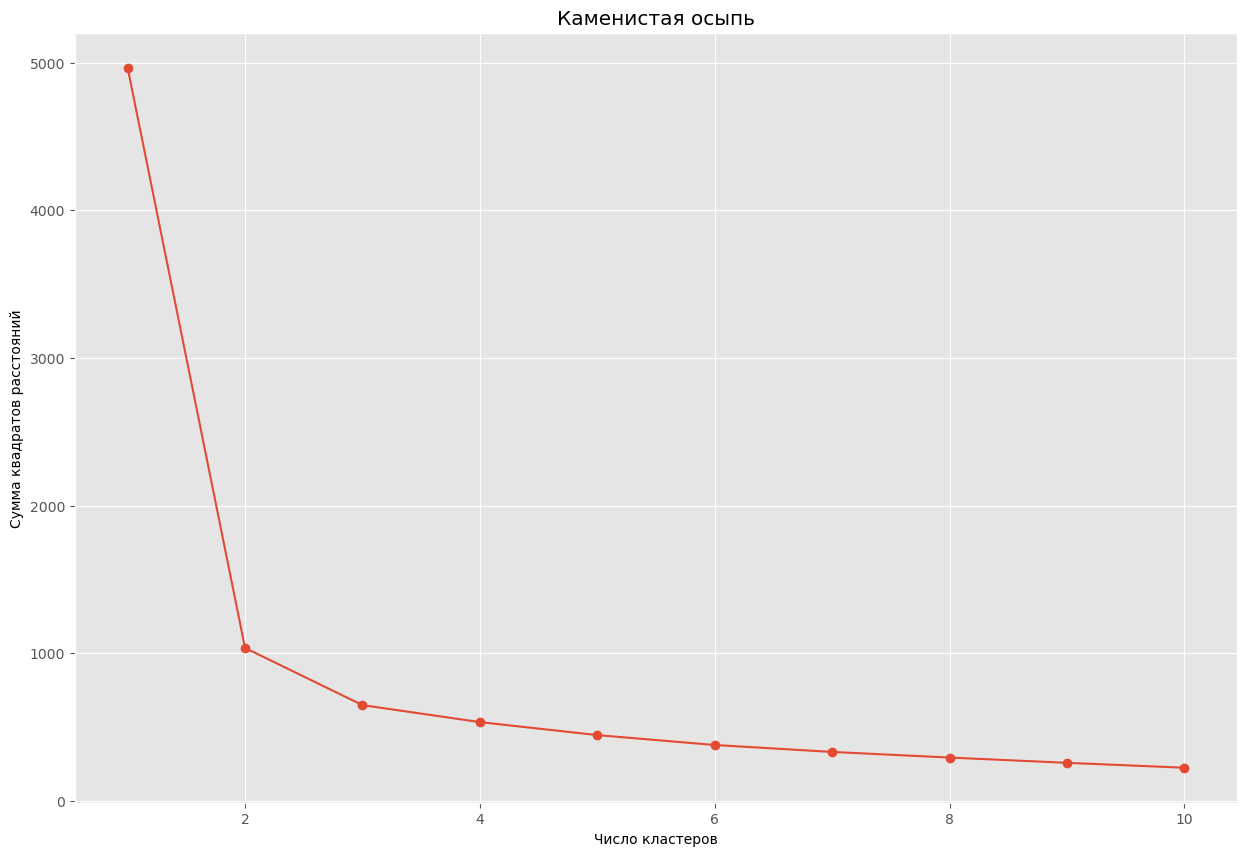

In [49]:
K = range(1, 11)
models = [KMeans(n_clusters = k, random_state = 111, n_init = 100, max_iter = 10000).fit(df) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

**Как видно из графика можно рассматривать от трех до 6 кластеров**<br>
Произведем кластеризацию для каждого случая и визуализируем полученные результаты.

              Status       Dep       Emp
3_clusters                              
0           1.807547  6.932075  2.637736
1           2.552381  6.242857  2.419048
2           2.336735  1.311224  2.545918


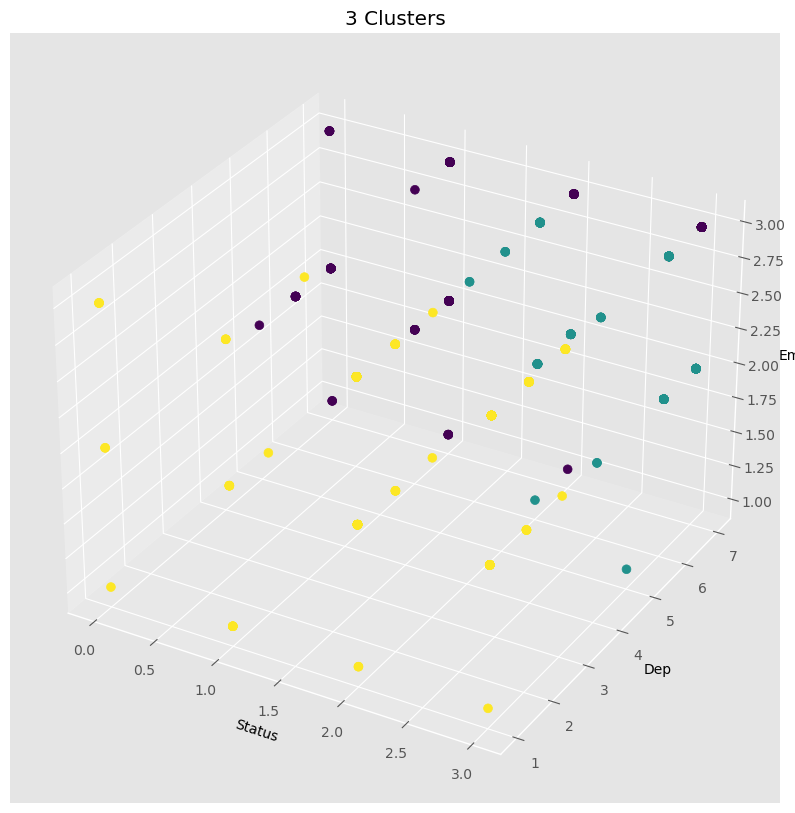

              Status       Dep       Emp
4_clusters                              
0           2.552381  6.242857  2.419048
1           0.661290  6.854839  2.225806
2           2.336735  1.311224  2.545918
3           2.815603  7.000000  3.000000


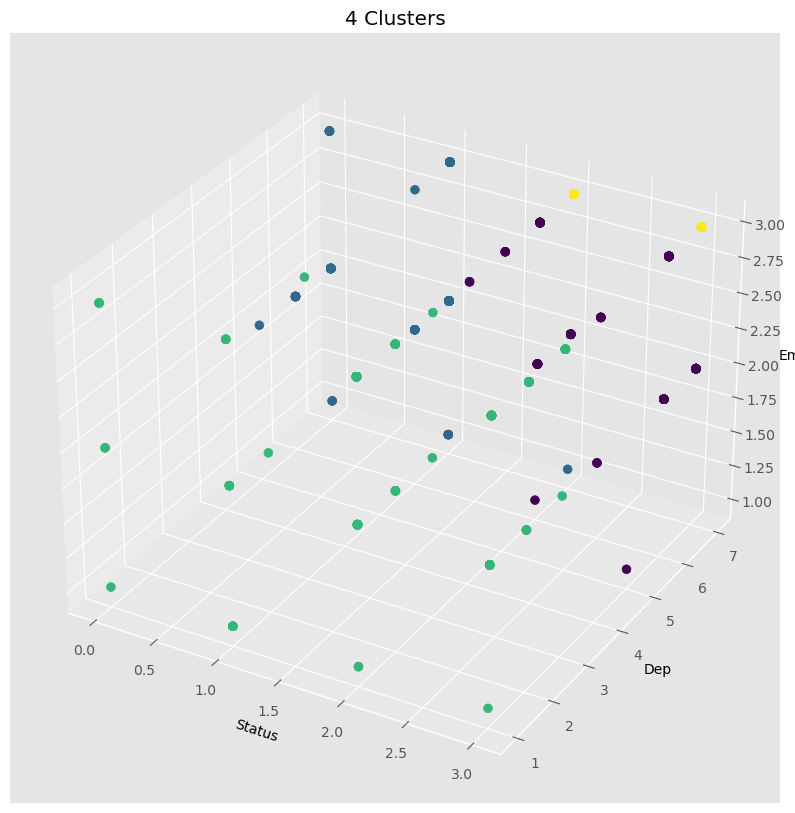

              Status       Dep       Emp
5_clusters                              
0           2.815603  7.000000  3.000000
1           1.710000  1.160000  2.420000
2           2.552381  6.242857  2.419048
3           0.661290  6.854839  2.225806
4           2.989583  1.468750  2.677083


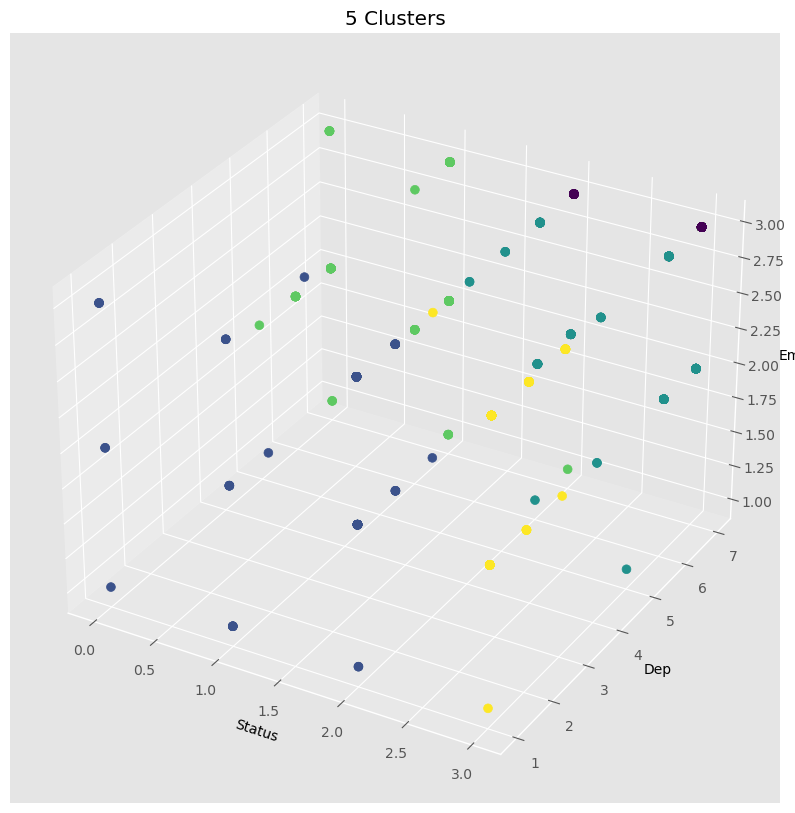

              Status       Dep       Emp
6_clusters                              
0           2.815603  7.000000  3.000000
1           2.547945  7.000000  2.000000
2           1.710000  1.160000  2.420000
3           0.661290  6.854839  2.225806
4           2.989583  1.468750  2.677083
5           2.554745  5.839416  2.642336


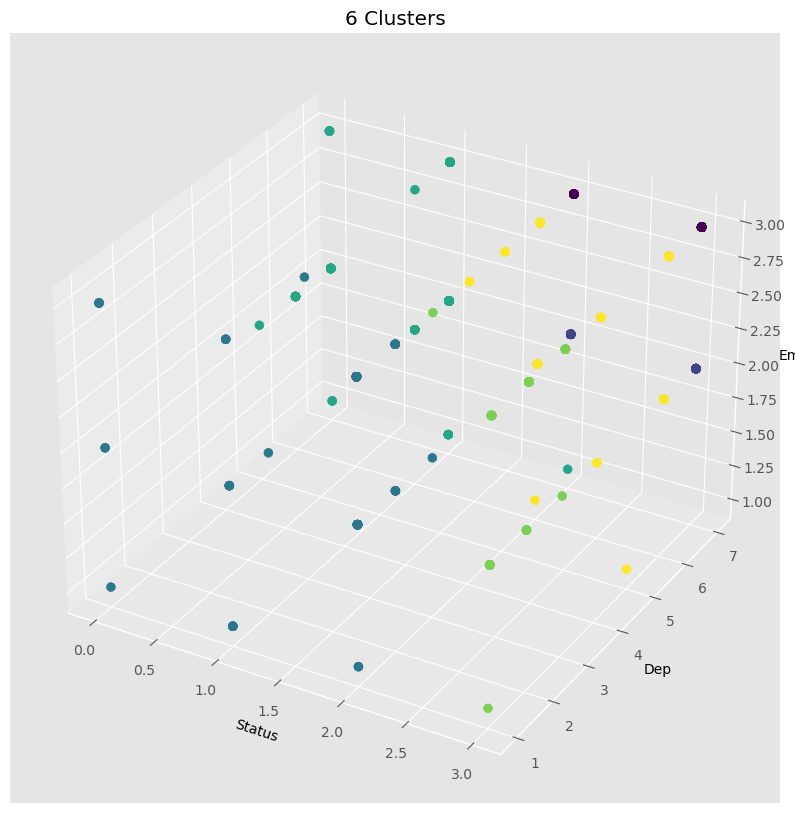

              Status       Dep       Emp
7_clusters                              
0           1.710000  1.160000  2.420000
1           0.661290  6.854839  2.225806
2           2.815603  7.000000  3.000000
3           2.554745  5.839416  2.642336
4           2.547945  7.000000  2.000000
5           3.000000  1.000000  2.609375
6           2.968750  2.406250  2.812500


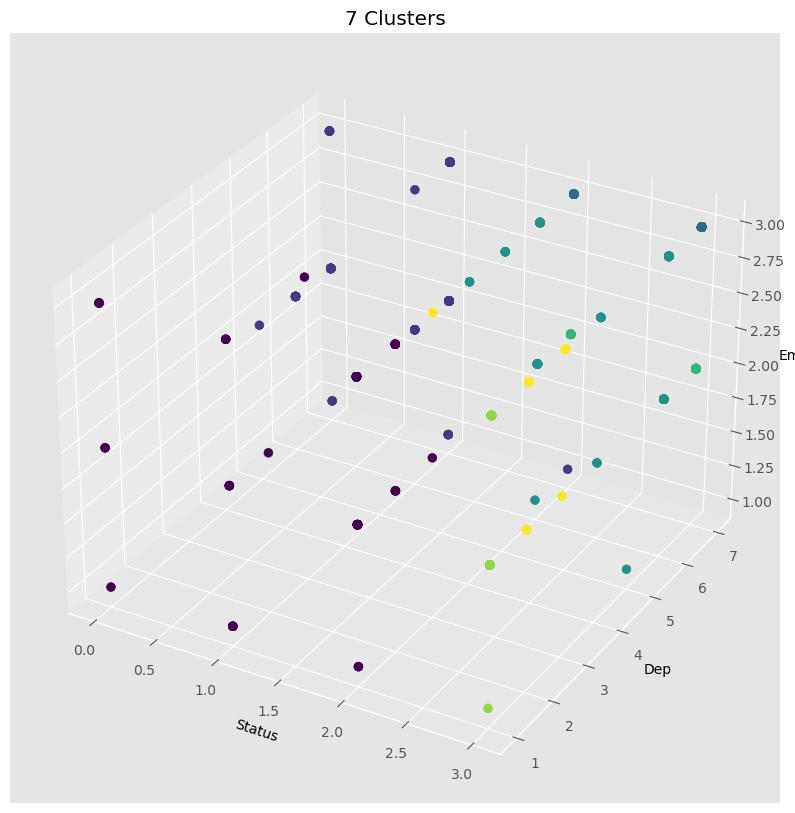

              Status       Dep       Emp
8_clusters                              
0           2.547945  7.000000  2.000000
1           1.710000  1.160000  2.420000
2           3.000000  1.000000  2.609375
3           2.000000  5.885246  2.606557
4           2.815603  7.000000  3.000000
5           0.661290  6.854839  2.225806
6           3.000000  5.802632  2.671053
7           2.968750  2.406250  2.812500


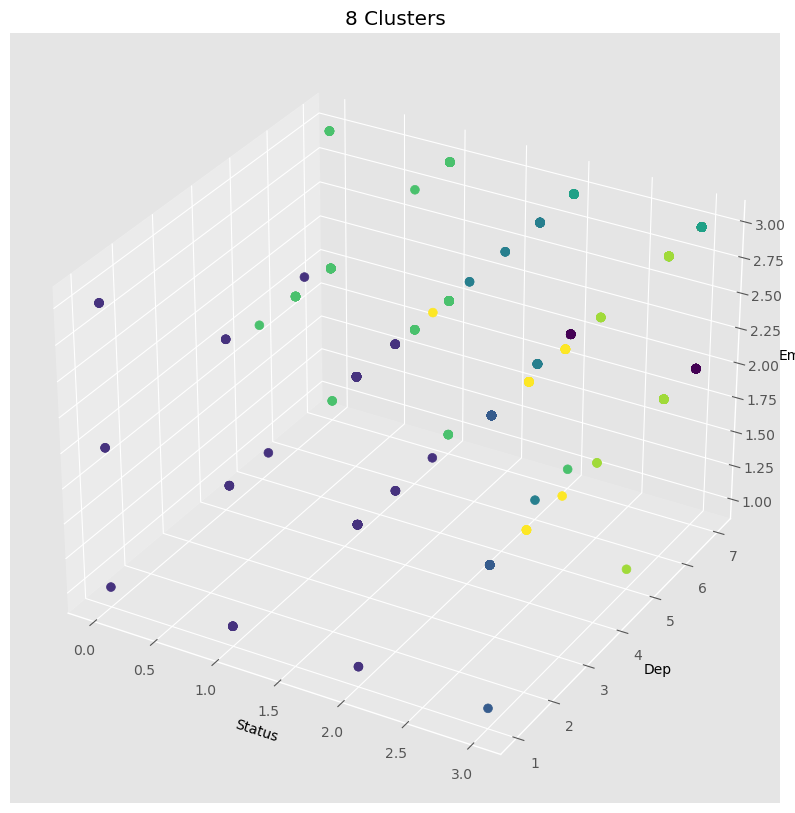

In [66]:
for i in range(3,9):
  model = KMeans(n_clusters = i, random_state = 777, n_init = 100, max_iter = 10000)
  model.fit(df)

  df[f'{i}_clusters'] = model.labels_
  print(df.groupby(f'{i}_clusters')[['Status','Dep','Emp']].mean())
  threedee = plt.figure(figsize=(20,10)).add_subplot(projection='3d')
 # threedee = plt.figure(figsize=(15,10)).gca(projection='3d')
  threedee.scatter(df["Status"], df["Dep"], df["Emp"], c = df[f'{i}_clusters'], alpha = 1, s =40)
  threedee.set_xlabel('Status')
  threedee.set_ylabel('Dep')
  threedee.set_zlabel('Emp')
  threedee.set_title(f'{i} Clusters')
  plt.show()


In [67]:
df.groupby('3_clusters')[['Status','Dep','Emp']].mean()

,Status,Dep,Emp
3_clusters,,,
0,1.807547,6.932075,2.637736
1,2.552381,6.242857,2.419048
2,2.336735,1.311224,2.545918


Напомним,что чем больше число у столбца Status тем активнее идет найм( если ближе к 0- вероятность закрытия  фирм).
Чем больше число в столбце Dep, тем больше отделов затронул найм.
Чем выше число в Emp, тем достовернее информация передаваемая в нашу базу.

1 Кластер - остановлен набор или идет сокращение в большинстве отделов
2 Кластер - идет набор в большинстве отделов
3 Кластер - продолжается набор в определенные отделы

In [68]:
df.groupby('4_clusters')[['Status','Dep','Emp']].mean()

,Status,Dep,Emp
4_clusters,,,
0,2.552381,6.242857,2.419048
1,0.661290,6.854839,2.225806
2,2.336735,1.311224,2.545918
3,2.815603,7.000000,3.000000


0 Кластер - совпал с первым кластером предыдущего случая
1 Кластер - закрыватются компании /идут сокращения в большинстве отделов
2 Кластер - совпал со вторым кластером предыдущего случая
3 Кластер - По информации от HR идет найм в большую часть/все отделы

In [69]:
df.groupby('5_clusters')[['Status','Dep','Emp']].mean()

,Status,Dep,Emp
5_clusters,,,
0,2.815603,7.000000,3.000000
1,1.710000,1.160000,2.420000
2,2.552381,6.242857,2.419048
3,0.661290,6.854839,2.225806
4,2.989583,1.468750,2.677083


In [ ]:
0 Кластер - совпал с третьим кластером предыдущего случая
1 Кластер - Продолжается набор в некоторые отделы, по информации от работников или HR
2 Кластер - совпал со нулевым кластером предыдущего случая
3 Кластер - совпал со первым кластером предыдущего случая
4 Кластер - Идет полный найм в некоторые отделы, по информации от работников или HR

**Итак, по полученным данным можно понять,что есть смысл выделить 4 или 5 кластер. Оба варианта даю некую картину обстановки с наймом в представленном датафрейме.
Дополнительно можно перевести сферы компаний в числовой вид и посмотреть как будет происходить ситуация в определенных отраслях.**